# 정보이론 (Information Theory) (120분)

**정보이론**은 개념적으적으로 설명하면, noisy channel을 통과하는 data와 관련된 수학의 한 부분으로서, 어떠한 메세지에 존재하는 정보의 양을 구체화하는 것을 토대로 합니다. 그리고 이를 더욱 일반적으로 앞서 배운 내용을 토대로 설명하자면, 어떠한 사건과 random variable에 존재하는 정보의 양을 구체화하는 것이며, 이를 **entorpy**라고 정의하고, 이는 probability를 사용하면 수치적으로 계산이 가능합니다. 이러한 정보와 entropy를 계산하는 것은 머신러닝에서 매우 유용하게 적용되고, 예를 들어서 feature selection, decision tree, classification와 같은 model을 설계할 때 많이 사용되고 있습니다. 따라서, 머신러닝을 하고자 하는 분들에게 있어서 정보와 entropy를 이해하는 것은 매우 중요하다고 할 수 있습니다. 

## 1. 정의

**정보이론**은 의사소통을 위한 정보의 정량화와 관련된 연구 분야입니다. 수학의 하위 분야로, 데이터 압축과 신호처리의 한계와 같은 주제와 관련이 있습니다. 그리고 이 분야는 미국 전화 회사인 벨 연구소에서 일했었던, Claude Shannon이 제안하고 개발하였고, 다음이 가장 잘 설명한 부분이라 가져왔습니다. 

> Information theory is concerned with representing data in a compact fashion (a task known as data compression or source coding), as well as with transmitting and storing it in a way that is robust to errors (a task known as error correction or channel coding).<br/>
                                                — Page 56, Machine Learning: A Probabilistic Perspective, 2012.

정보이론의 기초 개념은 어떠한 사건, random variable, 분포에 존재하는 정보의 양에 대한 정량화입니다. 그리고 이러한 정보의 정량화는 확률을 사용함으로서 가능하므로 확률과 정보이론의 관계는 매우 강하다고 할 수 있습니다. 이러한 정보의 정량화는 머신러닝과 인공지능에서 널리 사용되고 있으며, 예를 들어서 decision tree를 설계하거나 classifier 모델을 최적화하는데에 사용됩니다. 이렇게 머신러닝과 정보이론이 가까운 이유는 다음과 같은 구절에서 확인할 수 있습니다. 

> Why unify information theory and machine learning? Because they are two sides of the same coin. [...] Information theory and machine learning still belong together. Brains are the ultimate compression and communication systems. And the state-of-the-art algorithms for both data compression and error-correcting codes use the same tools as machine learning. <br/>
— Page v, Information Theory, Inference, and Learning Algorithms, 2003.

## 2. 사건에 대한 정보량 계산

정보이론(information theory)에서 정보(information)는 특정한 관찰에 의해 얼마만큼의 정보를 획득했는지 수치로 정량화한 값을 의미합니다. 예를 들어, 딥러닝에서는 모델 학습에 있어서 얼마나 영향력 있는지, 정보의 파급력 또는 놀람의 정도(surprising degree)로 해석할 수 있습니다. 즉, 정보량은 자주 발생하는 관찰이나 사건에 대해서는 작은 값을 갖고 자주 발생하지 않는 관찰이나 사건에 대해서는 큰 값을 갖게 된다고 할 수 있습니다. 예를 들어서, 공정 데이터기반 불량 검출 문제에서는 정상 생산품의 데이터가 불량 생산품의 데이터에 비해 훨씬 많습니다. 그렇다면, 상대적으로 발생할 확률이 적은 불량 생산품의 관찰이 우리에게 더 많은 정보를 제공할 수 있는 것입니다. 마찬가지로 유전자 정보 기반 특정 질병 예측 문제에서 상대적으로 얻기 어려운 비정상군의 유전자 데이터는 모델 학습에 있어서 더 중요하고 의미있는 데이터들입니다. 

이러한 정량화를 뒷받침하는 직관은 어떠한 사건에 의해서 발생할 수 있는 또는 발생할 수 없는 정보가 얼마나 놀라운 것인지 또는 유용한지를 판단하는 척도가 된다는 것입니다. 즉, 확률이 작은 사건들(거의 발생하지 않을 사건들)들은 더 놀라운 정보가 될 것이고, 반대로 확률이 큰 사건들(대부분 발생할 사건들)에 대해서는 놀랍지 않을 것입니다. 다시 말해서, 놀라울 수록 정보가 많은 것이고, 놀랍지 않을 수록 정보가 더 적다고 할 수 있습니다. 직관적으로 풀어썼기 때문에 이해가 잘 가지 않을 수 있지만, 다음과 같이 정리해보겠습니다. (정보이론에서 실제로 정보에 놀라운 정도, 즉 영어를 그대로 사용하면 surprise로서 표현하고 있습니다.)

* Low probability event: high information = surprising
* High probability event: low information = not surprising

좀 더 설명하자면, 희귀한 사건들은 더 불확실하여 우리가 예측하기 힘들기 때문에 더 놀라운 것이고, 예측하기 힘들다는 점에서 우리가 얻을 수 있는 정보가 더 많다고 할 수 있습니다. 따라서, 정보이론을 통해서 어떤 경우에도 존재하는 정보의 양을 계산할 수 있습니다. 이러한 정보량을 *Shannon information, self-information,* 또는 간단히 *information*이라고 명명하고, 다음과 같이 나타냅니다. 

$$ I(x) = -log(p(x))$$

$I(x)$는 $x$에 대한 정보양이고, $log()$는 밑이 2이고, $p(x)$는 사건 $x$에 대한 확률을 의미합니다. 이 때, $log()$의 밑이 2인 이유는 정보의 양을 측정하는 단위가 bit (binary digits)로 되어 있기 때문입니다. 이는 소음이 존재하는 통신내에서 발생하는 사건과 비트의 수를 직접적으로 표현하고자 하는 것으로 해석할 수 있습니다.

앞에 -는 정보양의 결과가 항상 0 또는 양수를 가지기 위함입니다. 정보는 어떠한 사건이 발생할 확률이 1일 경우에는 0이 되고, 이는 무조건 그 사건이 발생한다는 것을 의미하기 때문에 전혀 놀랍지 않은, 즉 정보가 없다는 것을 의미합니다. 그리고 확률에 대한 $log$ 함수이기 때문에 확률이 $0 \leq p(x) \leq 1$이므로, 이에 대한 정보량은 (0, $\infty$]의 값을 갖습니다. 

예를 들어서, 다음과 같은 그래프처럼 나타날 수 있습니다. 

<img src='./imgs/log.png'>

$p(A) = 0.99$인 일어날 확률이 높은 사건(A)이 있습니다. 이 사건을 통해서 얻을 수 있는 정보량 또는 사건으로부터 인한 놀람의 정도는 다음과 같습니다. (즉, 정보량은 다음과 같습니다.)

$$ I(A) = -log(p(A)) = -log0.99 = 0.01$$

반면, $p(B) = 0.01$으로 일어날 확률이 낮은 사건(B)의 정보량은 다음과 같습니다. 

$$ I(B) = -log(P(B)) = -log0.01 = 4.61$$

따럿, I(A)는 I(B)보다 훨씬 작은 값(정보량)을 갖습니다.  

이번에는 파이썬으로 코드를 작성하면서 예제를 풀어보도록 하겠습니다. 

**[예제 1]**

한 개의 동전을 던지는 문제에서 앞면과 뒷면이 나올 확률은 각각 50%입니다. 이를 코드를 통해 확인하면 다음과 같습니다. 


In [1]:
from math import log2

In [2]:
# 사건에 대한 확률값
p = 0.5
# information
I = -log2(p)

print('p(x)={:.3f}, 정보량: {:.3f} bits'.format(p, I))

p(x)=0.500, 정보량: 1.000 bits


즉, 위의 예제에서의 결과는 확률이 0.5로 나오는 하건은 1bit의 정보량을 담고 있다고 할 수 있습니다. 

이번에는 각각의 면이 나올 확률이 1/6으로 동일한 6면의 주사위를 던져보도록 하겠습니다. 


**[예제 2]**

In [3]:
from math import log2

In [4]:
# 사건에 대한 확률
p = 1.0 / 6.0
h = -log2(p)

print('p(x)={:.3f}, 정보량: {:.3f} bits'.format(p, h))

p(x)=0.167, 정보량: 2.585 bits


따라서, 위의 두 예제로 우리는 발생활 확률이 작을수록 정보량은 늘어난다는 것을 확인할 수 있습니다. 

위의 예제를 그래프로 나타내면, 다음과 같이 정보이론에서 확률과 정보량이 반대라는 직관에 대해서 좀 더 쉽게 이해할 수 있습니다.

In [5]:
from math import log2
import matplotlib.pyplot as plt

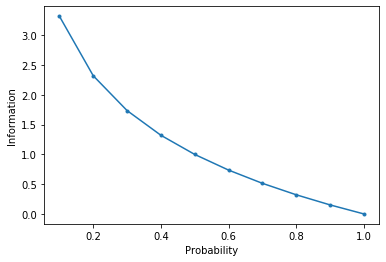

In [6]:
# 비교할 사건 확률의 리스트
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 정보량 계산
info = [-log2(p) for p in probs]

# plot probability vs information
plt.plot(probs, info, marker= '.' )
plt.xlabel('Probability')
plt.ylabel('Information')
plt.show()

그리고 지금까지 $log$의 밑으로서 2를 사용하였지만, 자연로그 또는 10을 사용하여도 계산하는 데에는 무방하지만, 앞서 설명하였듯이 bit가 정보의 단위로서 이를 직접적으로 표현하는 것이므로 대부분의 경우 밑이 2인 $log$를 많이 사용합니다. 

## 3. random variable에 대한 정보량 계산

이번에는 이산확률변수(discrete random variable)의 평균 정보량, 평균적인 놀람의 정도, 불확실성 정도를 나타내는 **entropy**를 정의해보겠습니다. 확률공간 $\Omega$와 이산확률변수 $X = x_1,..., x_N, x_i ∈ R, 1 \leq i \leq N$이 주어져있다고 하겠습니다. 여기서 확률변수 $X = x_1,..., x_N$의 표기법은 확률론에서 주로 사용하는 방법으로 엄밀히 말해서 $X(\Omega) = x_1,..., x_N$을 의미합니다. 그리고 

$$(X = x_i) := \omega \in \Omega : X(\omega) = x_i$$

으로 표기합니다.

사실 random variable에 대한 정보량을 계산하는 것은 random variable에 대한 사건의 확률분포의 정보량을 계산하는 것과 동일하다고 할 수 있습니다. 그리고 이는 *information entropy, Shannon entropy,* 또는 *entropy*라고 부릅니다. 따라서, 이들은 모두 불확실성(uncertainty)와 관련이 되어 있습니다. 그리고 이 entropy의 직관은 random variable에 대한 확률분포로부터 나타나는 사건을 나타내거나 전송하기 위해서 필요한 평균 비트 수를 의미하고, 다음의 원문을 참조하여 이해하면 도움이 될 것입니다. 

> ... the Shannon entropy of a distribution is the expected amount of information in an event drawn from that distribution. It gives a lower bound on the number of bits [...] needed on average to encode symbols drawn from a distribution P . <br/>
— Page 74, Deep Learning, 2016.


따라서, $K$개의 discrete state를 가지는 random variable($X$)에 대애서 다음과 같이 entropy를 계산할 수 있습니다.  

$$H(X) = -\sum^{K}_{i=1} p(k_i) \times log(p(k_i)) $$

앞선 사건에 대한 정보량인 $I()$와 마찬가지로 -의 부호를 가지고 있으며, 각각의 사건에 대한 확률과 확률의 $log$를 곱한 값의 총합으로 구해집니다. 그리고 마찬가지로 $log$의 밑은 2를 많이 사용합니다. 위의 계산식을 보면, 직관적으로 확률이 1인 단일 사건을 가지는 random variable에 대한 entropy를 계산할 때 나타나며, 가장 큰 entropy는 모든 사건의 확률이 동일한 경우에 대한 random variable의 entropy을 계산할 때 구해집니다. 


여기서 $p(k_i) := P(X = x_i)$입니다. 즉, 평균 정보량 $H(X)$는 $X$분포에서 $h$의 기댓값인 $E[−logP(X)]$을 의미합니다.

예를 들어서, 다음의 $X = 0, 1$인 확률 공간에서 확률값이 다른 3가지 예를 살펴보도록 하겠습니다. $X = 0, 1$이므로 평균 정보량 $H[X]$는 다음과 같이 쓸 수 있습니다.

$$H(X) = −[P(X = 0)logP(X = 0) + P(X = 1)logP(X = 1)]$$
 
* 첫 번째 경우
$$P(X = 0) = 0.5$$

$$P(X = 1) = 0.5$$

$$H(X) = −(0.5log0.5 + 0.5log0.5) = 0.69$$


* 두 번째 경우
$$P(X = 0) = 0.8$$

$$P(X = 1) = 0.2$$

$$H(X) = −(0.8log0.8 + 0.2log0.2) = 0.50$$

* 세 번째 경우
$$P(X = 0) = 1$$

$$P(X = 1) = 0$$

$$H(X) = −(1log1 + 0log0) = 0$$

여기서 $0log0 := 0$으로 정의합니다. 위 경우에서 첫 번째 경우인 $P(X = 0) = 0.5, P(X = 1) = 0.5$ 일 때 평균 정보량이 가장 많았고, 세 번째 경우인 $P(X = 0) = 1, P(X = 1) = 0$ 일 때 평균 정보량이 0으로 가장 적었습니다. 즉, 불확실성이 없다고 할 수 있습니다. 

다음으로는 일반적인 $X = x_1,..., x_N$의 경우에 대해서 평균 정보량 $H(X)$가 최대가 되는 $p_i$ 조합을 찾아보도록 하겠습니다. $p_i$들이 확률변수 $X$가 가지는 확률 값들이기 때문에 다음 조건을 만족합니다.

$$\sum_i^N p_i = 1$$

위 조건을 만족시키는 $p_i$들 중에서 $H(X)$가 최대값을 갖는 조합은 라그랑쥬 승수법으로 얻을 수 있습니다.

$$p_i = \frac{1}{N}, 1 \leq i \leq N$$

결론적으로 이산확률변수 $X$가 균일분포(uniform distribution)일 때 평균 정보량 $H(x)$이 최대값을 갖개 됩니다. 그리고 연속확률변수일 때는 정규분포(normal distribution)일 때 평균 정보량이 최대값을 갖게 되므로, 위 예에서 첫 번째 경우인 $P(X = 0) = 0.5, P(X = 1) = 0.5$일 때의 평균 정보량인 0.69가 최댓값입니다.



이번에는 코드를 통해서 앞선 예제와 마찬가지로, 1/6의 모두 동일한 확률로 6면이 나오는 주사위를 던질 때의 variable에 대한 entropy를 계산해보겠습니다. 각각의 결과는 1/6의 확률을 가지므로 uniform probability distribution입니다. 그러므로 앞선 **[예제2]**에서 정보량을 계산한 값과 동일할 것으로 예상할 수 있습니다.


**[예제 3]**

In [7]:
from math import log2


In [8]:
# 사건 횟수
n = 6
# 사건 하나당 확률
p = 1.0 /n

# entropy
entropy = []
for _ in range(n):
    entropy.append(p * log2(p))

print('entropy: {:.3f} bits'.format(sum(entropy)))

entropy: -2.585 bits


동일한 확률분포의 사건이 도출되는 random variable이 아닌 치우친 확률 분포와 같이 하나의 사건이 지배적인 경우를 가지는 random variable도 존재할 것이다. 그리고 마찬가지로 지배적인 사건에 대해서는 전혀 놀랍지 않으므로 정보량 또한 적을 것이므로 entropy는 낮을 것이고, 하나의 사건에 대해서 치우치지 않고, 모든 사건이 동일하거나 비슷한 확률분포를 가질 수록 entropy는 크게 계산됩니다. 이를 정리하면 다음과 같습니다. 

* Skewed Probability Distribution (unsurprising): Low entropy.


* Balanced Probability Distribution (surprising): High entropy.



그렇다면, 이번에는 확률분포에 따른 entropy가 어떻게 변화하는지 그리고 서로 어떤 관계인지에 대해서 살펴보도록 하겠습니다.

**[예제 4]**

In [9]:
from math import log2
import matplotlib.pyplot as plt

In [14]:
# entropy
def entropy(events, ets=1e-15):
    entropy = []
    for p in events:
        entropy.append(p * log2(p + ets))
    return -sum(entropy)

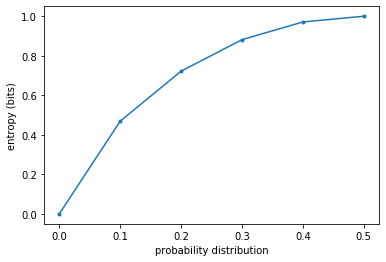

In [15]:
# 비교할 확률 리스트
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# 확률분포
p_distr = [[p, 1.0 - p] for p in probs]

# 각각의 분포에 대한 entropy
ents = [entropy(dist) for dist in p_distr]


# plot probability distribution vs entropy
plt.plot(probs, ents, marker= '.' )
plt.xlabel('probability distribution')
plt.ylabel('entropy (bits)')
plt.show()

위의 예제를 보면, 두 사건에 대한 확률이 [0, 1]과 같이 치우친 확률분포를 가진 경우에서 [0.5, 0.5]의 uniform distribution을 가지는 확률분포로 갈수록 entropy가 증가하는 것을 확인할 수 있습니다. 다시 말해서, 어떠한 확률분포에서 평균적으로 발생하는 사건이 예상 가능 (또는 놀랍지 않은, not surprising)하다면 낮은 entropy로 계산이 됩니다. 반면에, 발생한 사건이 예상 가능하지 않은 (또는 놀라운, surprising) 경우에 대해서는 높은 entropy가 나옵니다. 그리고 위의 코드에서 entropy를 계산하는 함수에서 ets는 확률이 0이 되어 $log()$의 결과가 무한대가 가는  경우를 피하기 위함입니다.

지금까지 살펴본 정보이론, 즉 random variable에 대한 entropy를 계산하는 것은 앞으로의 머신러닝 또는 딥러닝에서 많이 사용되는 mutual information (information gain)과 같이 또 다른 정보량을 계산하는 방법에 기본이 되는 이론이라고 할 수 있습니다. 또한 두 확률분포의 차이점을 계산할 수 있는 cross-entropy와 KL-divergence에서도 기본이 되는 개념으로서 정보이론은 매우 중요하기 때문에 반드시 이해하고 가시길 바랍니다.

## 4. KL Divergence

Kullback-Leibler Divergence, KL divergence는 어떤 확률 분포가 다른 확률분포와 얼마나 다른지를 알려주는 지표라고 할 수 있습니다. 이에 대한 표기는 다음과 같이 나타낼 수 있습니다. 예를 들어서, 두 확률 분포를 $Q와 P$라고 하겠습니다. 이에 대한 KL divergence는 

$$ KL(P\parallel Q) $$

입니다. ""$\parallel$"" 표기는 'divergence'를 의미하고, 위의 표기는 P의 분포가 Q와 얼마나 다른지를 의미합니다. 그리고 KL divergence는 다음과 같이 계산을 할 수 있도록 정의되고 있습니다. 

$$ KL(P \parallel Q) = –\sum_x P(x) \times log(frac{Q(x)}{P(x)})$$
$$ = \sum_x P(x) \times log(frac{P(x)}{Q(x)})$$

위와 같은 계산식에 대한 KL divergence의 직관은 두 확률 분포의 차이를 나타내는 것으로 다음과 같습니다. P로 부터 일어나는 사건의 확률이 커지고, Q의 확률이 작아질 때 KL divergence는 커집니다. 마찬가지로 반대의 상황인 P의 확률이 작아지고, Q가 커질수록 KL divergence는 커질 것입니다.

따라서, KL divergnece는 이산 확률분포와 연속 확률분포사이의 차이를 알고자 할 때도 사용할 수 있으며, 다음과 같이 정의되어 있습니다. 

> One way to measure the dissimilarity of two probability distributions, p and q, is known as the Kullback-Leibler divergence (KL divergence) or relative entropy. <br/>
— Page 57, Machine Learning: A Probabilistic Perspective, 2012.

이 때, $log$는 위에서 설명한데로 2를 밑으로 하는 것이 보통이며, 자연로그로서 밑을 e로 하여도 무방합니다. 결과적으로 두 확률분포에 대한 KL divergence의 값이 0이라면, 두 분포는 동일하다고 할 수 있으며, 그렇지 않으면 KL divergence는 0보다 큰 수를 갖습니다. 

그리고 KL divergence는 다음과 같은 중요한 특징을 가지고 있습니다. 

$$ KL(P\parallel Q) \neq KL(Q\parallel P)$$

즉, KL divergence는 계산하는 데에 있어서 symmetric이 아니라는 점입니다. (한글로는 좌우대칭이라고 할 수 있겠습니다.)

또한, KL divergence는 'relative entropy'라고도 언급되며, 많은 책에서도 다음과 같이 함꼐 정의되어 있습니다. 

> This is known as the relative entropy or Kullback-Leibler divergence, or KL divergence, between the distributions p(x) and q(x). <br/>
— Page 55, Pattern Recognition and Machine Learning, 2006.

위에 긴글로 KL divergence를 설명하였지만, 단순하게 정리하자면 KL divergence는 두 분포의 차이를 알려주는 것이라고 할 수 있습니다. 그리고 하나의 분포를 알고 있고 알지 못하는 분포에 대해서 추정을 하는 경우에도 사용이 가능하기 때문에 더욱 유용하게 딥러닝과 머신러닝에서 사용되는 측면이 있습니다. 이제부터는 코드를 통해서 KL divergence를 직접 구현해보도록 하겠습니다. 

**[에제 5]**
다음과 같이 세 개의 종류의 색깔이 있습니다. 그리고 우리는 두 가지의 다른 분포로 세 번 색을 선택하는 사건에 대해서 KL divergence를 적용하여 보겠습니다. 

In [16]:
import matplotlib.pyplot as plt # plot을 위한 library
from math import log2 # log2계산을 위한 library

먼저 확률 분포를 정의합니다.

In [17]:
events = ['red', 'green', 'blue', 'black']
p = [0.10, 0.40, 0.45, 0.05]
q = [0.70, 0.15, 0.05, 0.10]

정의한 확률분포에 대해서 각 확률분포는 확률의 정의에 따라 합이 모두 1입니다.

In [18]:
print('P={} Q={}'.format(sum(p), sum(q)))

P=1.0 Q=1.0


정의한 사건에 대해서 히스토그램으로 나타내면 다음과 같습니다.

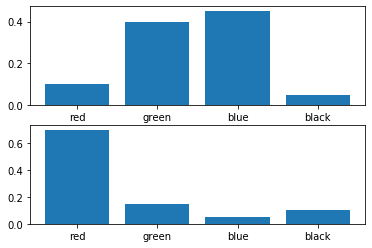

In [19]:
plt.subplot(2,1,1)
plt.bar(events, p)
plt.subplot(2,1,2)
plt.bar(events, q)
plt.show()

실제로 확률분포에 따른 각각의 사건이 일어나는 정도와 차이를 눈으로 확인할 수 있습니다. 이번에는 KL divergence를 통해서 그 차이를 지표로 나타내어 보겠습니다. 

먼저, KL divergence에 대한 식을 정의합니다.

In [20]:
def kl_divergence(p, q):
    ret = []
    for i in range(len(p)):
        ret.append(p[i] * log2(p[i]/q[i]))
                   
    return sum(ret)

In [21]:
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)

kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.662 bits
KL(Q || P): 1.694 bits


위와 같이 KL divergence를 지표로 나타내어 보았습니다. 그리고 앞서 설명하였듯이, KL divergence는 symmetric하지 않기 때문에 서로 주어진 확률분포가 어떤 것이냐에 따라서 서로 다른 KL divergence를 갖는 다는 것을 알 수 있습니다. 

## 5. Cross-entropy 

Cross-entropy는 앞서 설명한 KL divergence와 매우 유사한 개념이라고 할 수 있습니다. 정확히는 개념뿐만 아니라 계산식으로서 KL divergence로 유도할 수도 있습니다. 구체적으로 말하자면, KL divergence는 두 확률분포에서 기준이 되는 확률분포를 통해서 다른 확률분포를 나타내기 위한 여분의 평균 bits를 측정하는 것이라고 할 수 있으며, 다음과 같이 책에서 정의하고 있습니다. 

> In other words, the KL divergence is the average number of extra bits needed to encode the data, due to the fact that we used distribution q to encode the data instead of the true distribution p. <br/>
— Page 58, Machine Learning: A Probabilistic Perspective, 2012.

그렇기 때문에 KL divergence는 relative entropy라고 언급되기도 하는 것입니다. 

이에 반해 Cross-entropy는 여분의 평균 bits가 아닌 전체 bits를 측정하는 것이라고 할 수 있습니다. 이 차이는 오히려 한글로 설명하는 데에 있어서 더 오해를 부를 수 있기 때문에 다음과 같이 영어 그대로의 표현으로 정의를 살펴보겠습니다. 

* Cross-Entropy: Average number of total bits to represent an event from Q instead of P.

* Relative Entropy (KL Divergence): Average number of extra bits to represent an event from Q instead of P.

이제부터는 Cross-entropy를 어떻게 구할 수 있는지에 대해서 다루어보겠습니다. 앞서 말했듯이, Cross-entropy는 KL divergence를 이용하여 유도할 수 있습니다. 결과적으로는 Cross-entropy인 $H(P, Q)는 다음과 같습니다. 

$$ H(P, Q) = H(P) + KL(P \parallel Q)$$

즉, Corss-entropy는 어떤 확률분포에 대한 entropy와 KL divergence의 합으로서 구할 수 있습니다. 각각의 entropy와 KL divergence를 구하는 방법은 위에서 설명하였기 때문에 생략하곘습니다. 그리고 KL divergence와 마찬가지로 Cross-entropy도 symmetric하지 않습니다. 

$$ H(P, Q) \neq H(Q, P)$$

이번에는 코드를 통해서 Cross-entropy를 직접 구현하여 보겠습니다. 앞선 **[예제 5]**와 동일한 예를 사용하겠습니다. 

**[예제 6]**

먼저 확률 분포를 정의합니다.

In [22]:
import matplotlib.pyplot as plt # plot을 위한 library
from math import log2 # log2계산을 위한 library

In [23]:
events = ['red', 'green', 'blue', 'black']
p = [0.10, 0.40, 0.45, 0.05]
q = [0.70, 0.15, 0.05, 0.10]

그리고 Cross-entropy를 계산하는 식을 다음과 같이 함수로서 만듭니다. 

In [24]:
def cross_entropy0(p, q):
    ret = []
    for i in range(len(p)):
        ret.append(p[i]*log2(q[i]))
        
    return -sum(ret)

이에 대해서 Cross-entropy는 다음과 같이 나타납니다.

In [25]:
ce_pq = cross_entropy0(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

ce_qp = cross_entropy0(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.257 bits
H(Q, P): 3.013 bits


이 때, 동일한 확률분포, 즉 자기 자신을 자신에게 비교하면 어떤 Cross-entropy가 나올지 확인해보겠습니다. 

In [26]:
ce_pp = cross_entropy0(p, p)
print('H(P, P): %.3f bits' % ce_pp)

ce_qq = cross_entropy0(q, q)
print('H(Q, Q): %.3f bits' % ce_qq)

H(P, P): 1.595 bits
H(Q, Q): 1.319 bits


이번에는 앞서 설명하였듯이,  KL divergence와 entropy의 앞으로서 Cross-entropy를 구하여보겠습니다. 

In [27]:
def kl_divergence(p, q):
    ret = []
    for i in range(len(p)):
        ret.append(p[i] * log2(p[i]/q[i]))
    
    return sum(ret)
 
def entropy(p):
    entropy = []
    for i in range(len(p)):
        entropy.append(p[i] * log2(p[i]))
    
    return -sum(entropy)
 
def cross_entropy1(p, q):
    return entropy(p) + kl_divergence(p, q)

In [28]:
en_p = entropy(p)
print('H(P): %.3f bits' % en_p)

kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)

ce_pq = cross_entropy1(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

H(P): 1.595 bits
KL(P || Q): 1.662 bits
H(P, Q): 3.257 bits
